## ***chargement du dataset*** 

In [4]:
#library
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


In [5]:
list_attr=pd.read_csv("/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/list_attr_celeba.txt" , sep = "\s+", header = 0)
print(list_attr.head())
list_attr.to_csv("list_attr_outputtab.txt", sep=" ", index=True)

## exemple pour voir combien de personnes ont tels oi tels attribus
#print(" il y a", list_attr[list_attr["Wearing_Hat"] == 1].shape[0], "personne qui portent des chapeau")

from tabulate import tabulate

with open("list_attr_output.txt", "w") as f:
    f.write(tabulate(list_attr, headers="keys", tablefmt="grid"))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\acaci\AppData\Local\Temp\ipykernel_23540\914098405.py:1: SyntaxWarning: invalid escape sequence '\s'
  list_attr=pd.read_csv("/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/list_attr_celeba.txt" , sep = "\s+", header = 0)
C:\Users\acaci\AppData\Local\Temp\ipykernel_23540\914098405.py:1: SyntaxWarning: invalid escape sequence '\s'
  list_attr=pd.read_csv("/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/list_attr_celeba.txt" , sep = "\s+", header = 0)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/list_attr_celeba.txt'

## Ouvrir le dataset qui place le pixels faciaux

In [35]:
list_landmarks=pd.read_csv("/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/list_landmarks_align_celeba.txt" , sep = "\s+", header = 0)
print(list_landmarks.head())

            lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
000001.jpg         69        109         106         113      77     142   
000002.jpg         69        110         107         112      81     135   
000003.jpg         76        112         104         106     108     128   
000004.jpg         72        113         108         108     101     138   
000005.jpg         66        114         112         112      86     119   

            leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
000001.jpg           73          152           108           154  
000002.jpg           70          151           108           153  
000003.jpg           74          156            98           158  
000004.jpg           71          155           101           151  
000005.jpg           71          147           104           150  


### On charge les donnée proprement

In [20]:
def load_celeba_metadata():
    """Charge les attributs et les coordonnées faciales des images de CelebA."""
    list_attr=pd.read_csv("/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/list_attr_celeba.txt" , sep = "\s+", header = 0)
    df_landmarks=pd.read_csv("/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/list_landmarks_align_celeba.txt" , sep = "\s+", header = 0)

    return list_attr, df_landmarks



## Convertion et ouverture de l'image

On utilisera `.upper()` dans la fonction convertion pour pas qu'il y ait de confusion entre 'png' et 'PNG'.

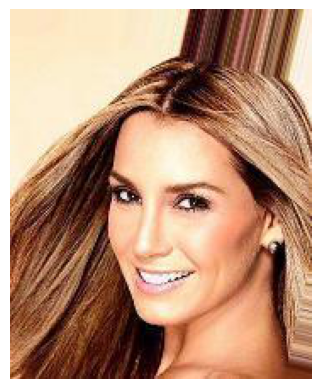

None


In [27]:

def convert_img(img, format_str):
    """Convertit l’image img dans le format contenu dans format_str (soit PNG soit JPG)."""
    if format_str.upper() == 'PNG':
        img = img.convert('RGBA')  # Conversion en mode RGBA pour assurer la compatibilité
    elif format_str.upper() == 'JPG':
        img = img.convert('RGB')  # Conversion en mode RGB pour JPG
    return img


def load_image(image_path):
    """Charge et affiche l'image convertie en png."""
    img=Image.open(image_path)
    if img.format == 'JPG':
        img = convert_img(img, 'PNG')
        image_path = image_path.rsplit('.', 1)[0] + "_converted.png"  # Nouveau nom de fichier
        img.save(image_path, "PNG")  # Sauvegarde en PNG
        print(f"Image PNG convertie et enregistrée sous {image_path}")
    
    plt.imshow(img)
    plt.axis('off')  # Cache les axes pour une meilleure visibilité
    plt.show()
    
print(load_image("/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/algo_gen/000001.jpg"))

In [ ]:

# Charger l'image
image = cv2.imread("image.png")  # Remplace par ton chemin
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convertir en niveaux de gris

# Trouver les pixels non noirs
coords = np.column_stack(np.where(gray > 10))  # Seuil pour ignorer le noir
x, y, w, h = cv2.boundingRect(coords)  # Boîte englobante

# Rogner l'image
cropped = image[y:y+h, x:x+w]

# Afficher l’image rognée
cv2.imshow("Image recadrée", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Sauvegarder si besoin
cv2.imwrite("image_crop.png", cropped)


## Placer les pixels des yeux, nez, bouche

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


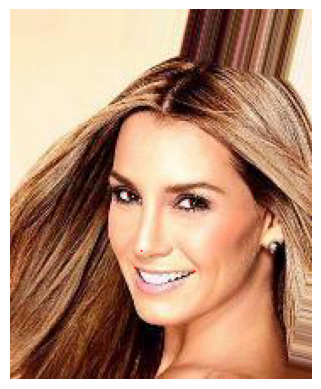

In [79]:

def draw_pixels(image_path, pixel_positions):
    """Charge une image et ajoute des pixels aux positions spécifiées."""
    img = Image.open(image_path).convert("RGBA")  # Assure la compatibilité
    
    draw = ImageDraw.Draw(img)
    
    for x, y in pixel_positions:
        draw.point((x, y), fill="red")  # Dessine un pixel rouge aux positions données
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Liste des positions des pixels à ajouter (exemple)
pixel_positions = [
    (69, 109), (106, 113), (77, 142), (73, 152),
    (108, 154)  # Ajoute d'autres coordonnées si nécessaire
]

# Afficher l'image avec les pixels ajoutés
draw_pixels("/Users/ouiamelhajji/Documents/INSA/4A/S2/devweb/000001.jpg", pixel_positions)


### **Collecte du questionnaire utilisateur** :

In [44]:

def get_user_description():
    """Récupère les réponses du questionnaire utilisateur sur l’assaillant. sous forme de dict"""
    attr_name = list(list_attr.columns) # données d'entraînement en attendant le questionnaire
    user_description = list(list_attr.iloc[0])
    
    return attr_name, user_description
#get_user_description()

(['5_o_Clock_Shadow',
  'Arched_Eyebrows',
  'Attractive',
  'Bags_Under_Eyes',
  'Bald',
  'Bangs',
  'Big_Lips',
  'Big_Nose',
  'Black_Hair',
  'Blond_Hair',
  'Blurry',
  'Brown_Hair',
  'Bushy_Eyebrows',
  'Chubby',
  'Double_Chin',
  'Eyeglasses',
  'Goatee',
  'Gray_Hair',
  'Heavy_Makeup',
  'High_Cheekbones',
  'Male',
  'Mouth_Slightly_Open',
  'Mustache',
  'Narrow_Eyes',
  'No_Beard',
  'Oval_Face',
  'Pale_Skin',
  'Pointy_Nose',
  'Receding_Hairline',
  'Rosy_Cheeks',
  'Sideburns',
  'Smiling',
  'Straight_Hair',
  'Wavy_Hair',
  'Wearing_Earrings',
  'Wearing_Hat',
  'Wearing_Lipstick',
  'Wearing_Necklace',
  'Wearing_Necktie',
  'Young'],
 [-1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  1,
  -1,
  1,
  -1,
  -1,
  1,
  -1,
  -1,
  1,
  -1,
  -1,
  -1,
  1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  -1,
  1])

### **Retourner le/les visage/s basé/s sur le questionnaire**


In [1]:
def return_face_from_description( df_attributes):
    """return les visages du df qui correspondent aux réponses de l'utilisateur."""
    attr_name , user_description = get_user_description()
    list_img=[]
    
    for j in range(len(df_attributes)):
        for i in range(len(attr_name)):
            if list_attr.iloc[j][attr_name[i]]== user_description[i]:
                i=i+1    
        list_img.append(list_attr.index[j])
    return list_img, len(list_img)
#print(return_face_from_description(list_attr))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [75]:
def return_face_from_description(df_attributes):
    """ Retourne les visages du df qui correspondent aux réponses de l'utilisateur."""
    attr_name, user_description = get_user_description()
    list_img = []

    for j in range(len(df_attributes)):  `
        match = True  # on supp que la ligne est correcte

        for i in range(len(attr_name)):  
            if df_attributes.iloc[j][attr_name[i]] != user_description[i]:
                match = False  # si un seul attribut ne correspond pas, on arrête
                break  # ciao

        if match:  # tous les attributs correspondent, on ajoute l'image
            list_img.append(df_attributes.index[j])  

    return list_img, len(list_img)

# Test de la fonction
print(return_face_from_description(list_attr))


(['000001.jpg', '052501.jpg', '196843.jpg'], 3)


In [16]:
print(list_attr)
print(list_attr.iloc[0,0])
print(list_attr.columns[0])

            5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
000001.jpg                -1                1           1               -1   
000002.jpg                -1               -1          -1                1   
000003.jpg                -1               -1          -1               -1   
000004.jpg                -1               -1           1               -1   
000005.jpg                -1                1           1               -1   
...                      ...              ...         ...              ...   
202595.jpg                -1               -1           1               -1   
202596.jpg                -1               -1          -1               -1   
202597.jpg                -1               -1          -1               -1   
202598.jpg                -1                1           1               -1   
202599.jpg                -1                1           1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_

In [88]:
def get_photos_matching_form(dict_form, df_attr):
    dropping = []
    
    for key, value in dict_form.items():
        if value == 0:
            continue

        for index, val in zip(df_attr[key].index, df_attr[key].values):
            if val != value:  # Correction de 'ind' qui était une variable inexistante
                dropping.append(index)
    df_form = df_attr.drop(dropping)

    return df_form.index

In [ ]:
dict_form = {'Male': 1, 'Brown_Hair': -1, 'Gray_Hair': -1, 'Black_Hair': 1, 'Blond_Hair': -1, 'Wavy_Hair': -1, 'Straight_Hair': 1, 'Young': -1}

list_attr_final = get_photos_matching_form(dict_form , list_attr)
print(list_attr_final)

Index(['000135.jpg', '000433.jpg', '000452.jpg', '000617.jpg', '000649.jpg',
       '000724.jpg', '000815.jpg', '000859.jpg', '000879.jpg', '000983.jpg',
       ...
       '201683.jpg', '201713.jpg', '201719.jpg', '201882.jpg', '201946.jpg',
       '202121.jpg', '202131.jpg', '202266.jpg', '202370.jpg', '202384.jpg'],
      dtype='object', length=1585)


In [54]:
def filter_blurry(df):
    droping = []

    for i in range(len(df)):
        if df.iloc[i,10] == 1:
            string_to_app = str(i+1) + ".jpg"
            string_to_app = string_to_app.zfill(10)
            droping.append(string_to_app)

    df_filtered = df
    df_filtered = df_filtered.drop(droping)

    return df_filtered